<a href="https://colab.research.google.com/github/KZoc/Formacao_1_Data_Science/blob/main/Estat%C3%ADstica/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|50|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
# Antes de definir os intervalos é importante eu visualizar os valores máximo e mínimo informados.
# Importante ressaltar, com base no valor mínimo (que é 0), que ele deverá estar incluso nas análises.
dados.Renda.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

In [5]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [6]:
nome_classes = ['E ► Até 2 SM', 'D ► De 2 a 5 SM', 'C ► De 5 a 15 SM', 'B ► De 15 a 25 SM', 'A ► Acima de 25 SM']

### 3º Construir a coluna de frequências

In [7]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda,
                                    bins = classes,
                                    labels = nome_classes,
                                    include_lowest = True),
                             )
frequencia

E ► Até 2 SM          49755
D ► De 2 a 5 SM       18602
C ► De 5 a 15 SM       7241
B ► De 15 a 25 SM       822
A ► Acima de 25 SM      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
percentuais = pd.value_counts(pd.cut(x = dados.Renda,
                                     bins = classes,
                                     labels = nome_classes,
                                     include_lowest = True),
                              normalize = True,
                              ) * 100
percentuais

E ► Até 2 SM          64.751432
D ► De 2 a 5 SM       24.208745
C ► De 5 a 15 SM       9.423477
B ► De 15 a 25 SM      1.069755
A ► Acima de 25 SM     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
distrib_freq_renda = pd.DataFrame({'Frequência' : frequencia, 'Porcentagem (%)' : percentuais})
distrib_freq_renda.rename_axis('Faixa Salarial', axis = 'columns', inplace = True)
distrib_freq_renda

Faixa Salarial,Frequência,Porcentagem (%)
E ► Até 2 SM,49755,64.751432
D ► De 2 a 5 SM,18602,24.208745
C ► De 5 a 15 SM,7241,9.423477
B ► De 15 a 25 SM,822,1.069755
A ► Acima de 25 SM,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

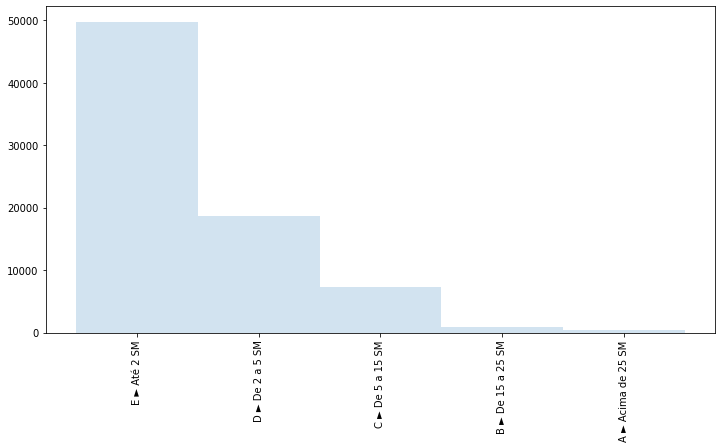

In [10]:
distrib_freq_renda['Frequência'].plot.bar(width = 1, alpha = 0.2, figsize=(12, 6), )

> ## Conclusões

É fácil observar que grande parte dos entrevistados são de baixa renda

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [11]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [12]:
dados.Idade.value_counts()

40    2263
45    2250
37    2235
43    2213
35    2206
      ... 
13       1
97       1
94       1
14       1
99       1
Name: Idade, Length: 84, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


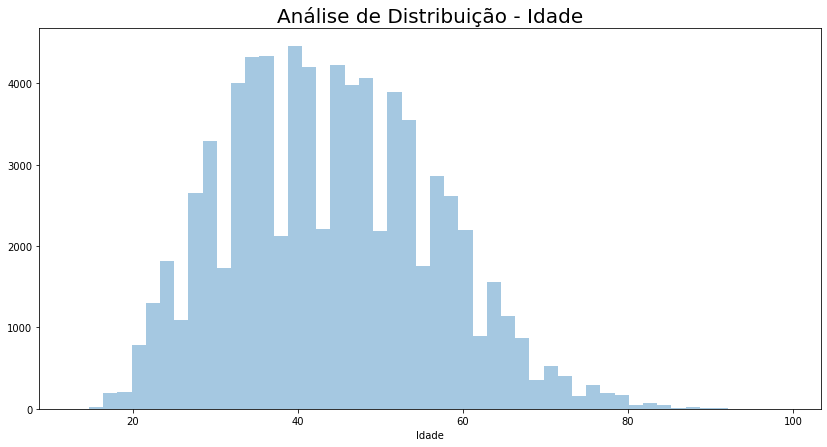

In [13]:
ax = sns.distplot(dados.Idade, kde = False)
ax.figure.set_size_inches(14, 7)
ax.set_title('Análise de Distribuição - Idade', fontsize = 20)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


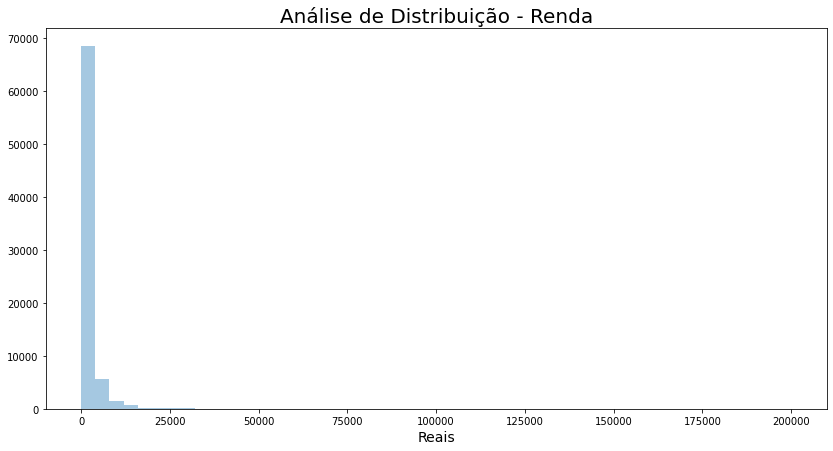

In [14]:
bx = sns.distplot(dados.Renda, kde = False)
bx.figure.set_size_inches(14, 7)
bx.set_title('Análise de Distribuição - Renda', fontsize = 20)
bx.set_xlabel('Reais', fontsize = 14)
bx

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


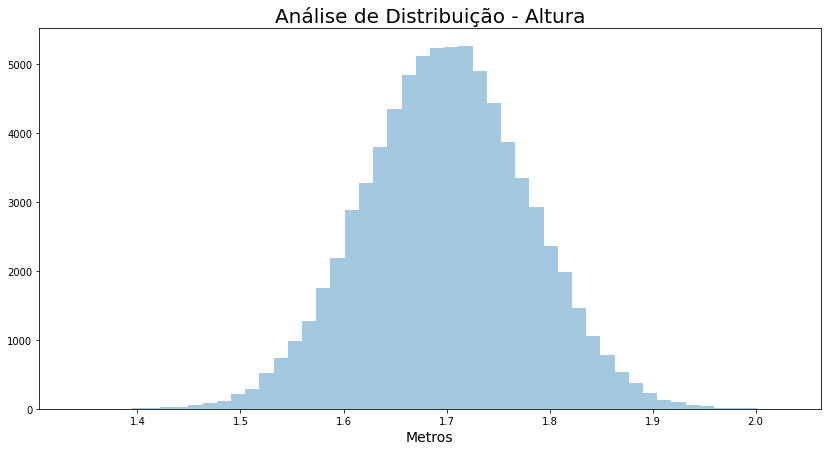

In [15]:
cx = sns.distplot(dados.Altura, kde = False)
cx.figure.set_size_inches(14, 7)
cx.set_title('Análise de Distribuição - Altura', fontsize = 20)
cx.set_xlabel('Metros', fontsize = 14)
cx

> ### Conclusões

 -  Começando com o grafico de distribuição da Idade, observo uma leve assimetría a direita, o que me faz observar que existem poucos chefes de família mais velhos (idade > 70 anos mais ou menos)
 -  Analisando o grafico de distribuição da Renda, percebo uma forte assimetría à direita, de modo que fica claro uma variação salarial, dadas as devidas proporções (R$ x qtde e ocorrências). Desta forma é importante analisar melhor esses dados, para não obter insights errados, por exemplo, sobre a média salarial.
 - Já o grafico de distribuição da Altura, vejo uma simetria.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


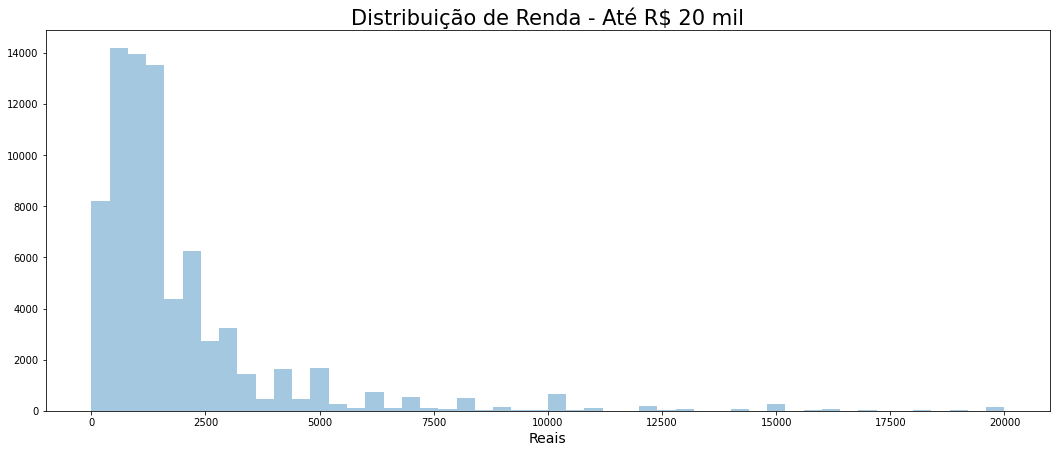

In [16]:
bx = sns.distplot(dados.query('Renda <= 20000').Renda, kde = False)
bx.figure.set_size_inches(18, 7)
bx.set_title('Distribuição de Renda - Até R$ 20 mil', fontsize = 21)
bx.set_xlabel('Reais', fontsize = 14)
bx

### Construa uma tabela de frequências e uma com os percentuais do cruzamento das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [17]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    50: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [18]:
freq_sexo_por_cor = pd.crosstab(dados.Cor, dados.Sexo)
freq_sexo_por_cor.rename(index = cor, inplace = True)
freq_sexo_por_cor.rename(columns = sexo, inplace = True)
freq_sexo_por_cor

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [19]:
porcent_sexo_por_cor = pd.crosstab(dados.Cor, dados.Sexo, normalize = True) * 100
porcent_sexo_por_cor.rename(index = cor, inplace = True)
porcent_sexo_por_cor.rename(columns = sexo, inplace = True)
porcent_sexo_por_cor

Sexo,Masculino,Feminino
Cor,,
Indígena,0.333160,0.131442
Branca,28.883394,12.520822
Preta,7.160333,3.759761
Amarela,0.305830,0.152264
Parda,32.617126,14.135867


> ### Conclusões

 -  Com base nas duas tabelas observo que há a predominância das pessoas de cor Branca e Parda, sendo que o sexo predominante na pesquisa foi o masculino.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [20]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [21]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [22]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [23]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [24]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [25]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [26]:
info_renda = pd.crosstab(dados.Cor, dados.Sexo, values = dados.Renda, aggfunc = {'mean', 'median', 'max'})
info_renda.rename(index = cor, inplace = True)
info_renda.rename(columns = sexo, inplace = True)
info_renda.rename(columns = {'max':'Renda Máx.', 'mean':'Renda Média', 'median':'Renda Mediana'}, inplace = True)
info_renda

Renda Máx.            Renda Média              Renda Mediana         
Sexo      Masculino  Feminino    Masculino     Feminino     Masculino Feminino
Cor                                                                           
Indígena    10000.0  120000.0  1081.710938  2464.386139         797.5    788.0
Branca     200000.0  100000.0  2925.744435  2109.866750        1700.0   1200.0
Preta       50000.0   23000.0  1603.861687  1134.596400        1200.0    800.0
Amarela     50000.0   20000.0  4758.251064  3027.341880        2800.0   1500.0
Parda      100000.0   30000.0  1659.577425  1176.758516        1200.0    800.0

> ### Conclusões

-  Sobre a Renda Máxima do sexo masculino observo grande variação de valor frente a Cor, mais ainda a diferença é maior entre o sexo masculino e o feminino. Isso tudo reforça os temas de desigualdade com relação ao sexo e cor, mostrando (com base nesses dados) o "privilégio" dos homens brancos. Entretanto, é importante reforçar que há no dataset algumas rendas que são totalmente fora da maioria, o que observamos no gráfico de barras da Renda que possui uma assimetria à direita. Ou seja, com base na pesquisa feita a renda máxima informada é uma "exeção" a maioria.
-  Sobre a Renda Média observo uma variação significativamente menor do que a observada na renda máxima, tanto para um mesmo sexo como entre os sexos. Porém, ainda observo a diferença salarial entre os sexos, mas agora vejo que as pessoas de Cor Amarela possuem uma média salarial maior, o que reforça a questão de que a renda máxima informada das pessoas de cor branca é de uma parcela MUITO pequena frente ao número de entrevistados.
-  Sobre a Renda Mediana observo novamente que as pessoas de cor Amarela ganham um salário maior do que as outras. Ainda noto a diferença salarial entre os sexos.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [27]:
dispersao_renda = pd.crosstab(dados.Cor, dados.Sexo, values = dados.Renda, aggfunc = {'mad', 'var', 'std'})
dispersao_renda.rename(index = cor, inplace = True)
dispersao_renda.rename(columns = sexo, inplace = True)
dispersao_renda.rename(columns = {'mad':'Desv. Méd. Absol..', 'var':'Variância', 'std':'Desvio Padrão'}, inplace = True)
dispersao_renda

Desv. Méd. Absol..              Desvio Padrão                \
Sexo              Masculino     Feminino     Masculino      Feminino   
Cor                                                                    
Indígena         798.910889  3007.892952   1204.093490  11957.498292   
Branca          2261.012346  1670.967106   4750.791872   3251.013154   
Preta            975.602482   705.453357   1936.309271   1349.799809   
Amarela         3709.597211  2549.146322   5740.824820   3731.173660   
Parda           1125.827704   811.580946   2312.087184   1596.233048   

             Variância                
Sexo         Masculino      Feminino  
Cor                                   
Indígena  1.449841e+06  1.429818e+08  
Branca    2.257002e+07  1.056909e+07  
Preta     3.749294e+06  1.821960e+06  
Amarela   3.295707e+07  1.392166e+07  
Parda     5.345747e+06  2.547960e+06

> ### Conclusões

-  

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

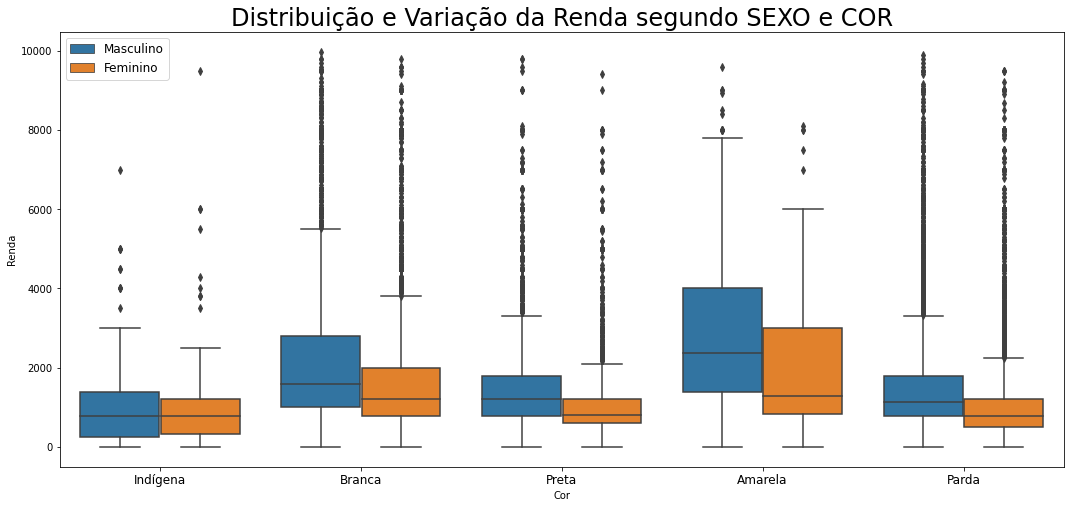

In [28]:
grafico_renda_boxplot = sns.boxplot(x = dados.Cor, y = dados.query('Renda < 10000').Renda, hue = dados.Sexo)
grafico_renda_boxplot.figure.set_size_inches(18, 8)
grafico_renda_boxplot.set_title('Distribuição e Variação da Renda segundo SEXO e COR', fontsize = 24)
grafico_renda_boxplot.set_xticklabels([key for key in cor.values()], fontsize=12)

handles, _ = grafico_renda_boxplot.get_legend_handles_labels()
grafico_renda_boxplot.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

grafico_renda_boxplot

> ### Conclusões

Seguindo a linha das observações anteriores, vejo que de modo geral as mulheres possuem uma média salarial menor do que os homens.
Outro ponto é a média salarial das pessoas de cor amarela ser um pouco maior do que os outros.
A média salarial entre as pessoas de cor indígena, branca, preta e parda estão muito próximas, porém, a média das pessoas brancas é um pouco maior.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [29]:
from scipy import stats

In [30]:
ganham_ate_1minimo_SCIPY = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
ganham_ate_1minimo_SCIPY

28.86777719937533

### Abaixo utilizei uma alternativa sem o Scipy.

In [31]:
ganham_ate_1minimo = (dados.value_counts(dados.query('Renda <= 788').Renda).sum()) * 100 / len(dados)
ganham_ate_1minimo.round(2)

28.87

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [32]:
rendaMax = dados.Renda.quantile(0.99)
rendaMax

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [33]:
renda_por_estudoesexo = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, values = dados.Renda, aggfunc = ['mean', 'median', 'max', 'std'])
renda_por_estudoesexo.rename(columns = sexo, inplace = True)
renda_por_estudoesexo.rename(columns = {'mean': 'Média', 'median': 'Mediana', 'max': 'Máximo', 'std': 'Desv. Padrão'}, inplace = True)
renda_por_estudoesexo

Média                Mediana             Máximo  \
Sexo              Masculino     Feminino Masculino Feminino Masculino   
Anos de Estudo                                                          
1                799.494638   516.201748       700      390     30000   
2                895.629047   492.771987       788      400     30000   
3                931.178986   529.911638       788      450     40000   
4               1109.203862   546.853916       800      500     80000   
5               1302.329283   704.279111      1000      788     50000   
6               1338.653218   781.389776      1045      788     35000   
7               1448.875419   833.732824      1200      788     25000   
8               1465.497940   830.751004      1200      788     40000   
9               1639.396667   933.615351      1300      800     30000   
10              1508.038850   868.021700      1200      788     60000   
11              1731.270847   925.919225      1218      800     45000   
12              2117.060504  1286.790889      1500     1000    200000   
13              2470.330776  1682.313725      1800     1200     30000   
14              3195.099154  1911.730047      2400     1300     25000   
15              3706.620269  2226.460457      2500     1600     50000   
16              6134.279790  3899.513231      4000     2800    200000   
17              1295.761905   798.174419      1200      788      7000   

                        Desv. Padrão               
Sexo           Feminino    Masculino     Feminino  
Anos de Estudo                                     
1                 10000  1023.904884   639.311534  
2                  2000  1331.950552   425.291842  
3                  4000  1435.173827   498.234168  
4                  3500  2143.800133   424.124446  
5                 10000  1419.821787   629.553397  
6                  8000  1484.650587   635.782641  
7                  6000  1476.628602   574.547028  
8                  9000  1419.708673   602.038029  
9                 18000  1515.583715   896.781213  
10                20000  2137.664774   973.221652  
11                 6000  2078.609734   620.611907  
12               100000  2676.538942  1819.040417  
13               120000  2268.081538  4851.833513  
14                20000  2797.116800  2053.789771  
15                20000  3987.214974  2064.083336  
16               100000  7447.613594  4212.770709  
17                 3000   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

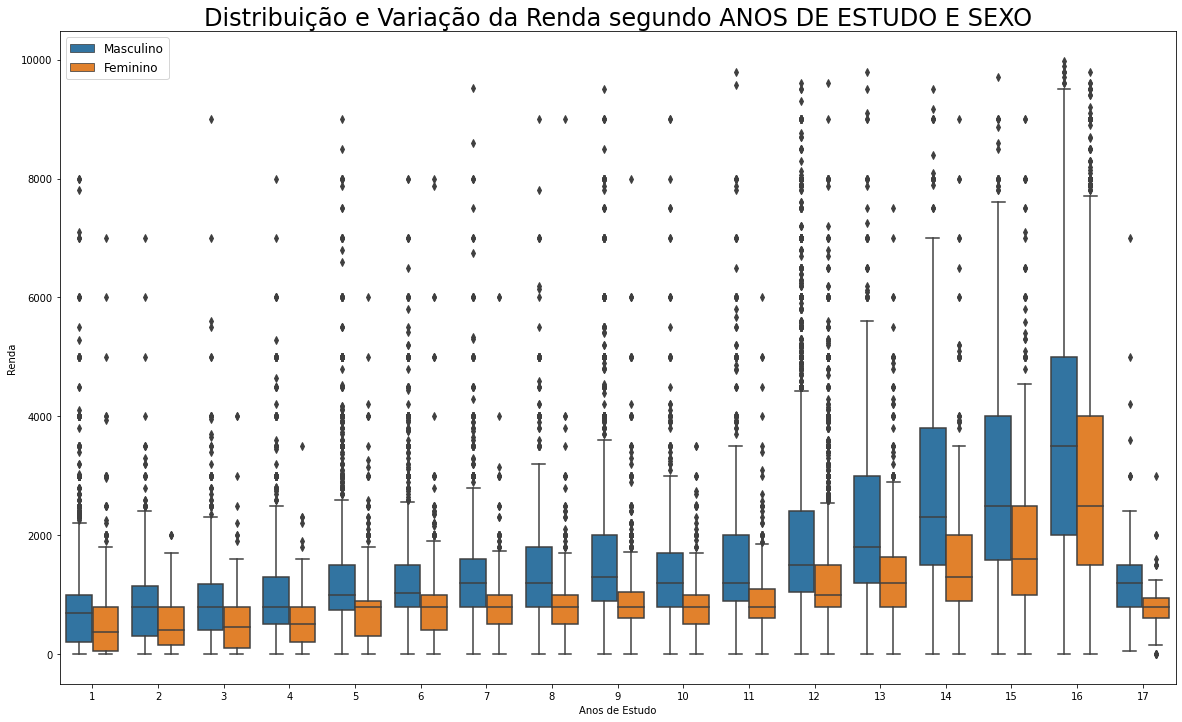

In [34]:
grafico_renda_estudoEsexo = sns.boxplot(x = 'Anos de Estudo', y = 'Renda', hue = 'Sexo', data = dados.query('Renda < 10000'))
grafico_renda_estudoEsexo.figure.set_size_inches(20, 12)
grafico_renda_estudoEsexo.set_title('Distribuição e Variação da Renda segundo ANOS DE ESTUDO E SEXO', fontsize = 24)
#grafico_renda_estudoEsexo.set_xticklabels([key for key in cor.values()], fontsize=12)

handles, _ = grafico_renda_estudoEsexo.get_legend_handles_labels()
grafico_renda_estudoEsexo.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

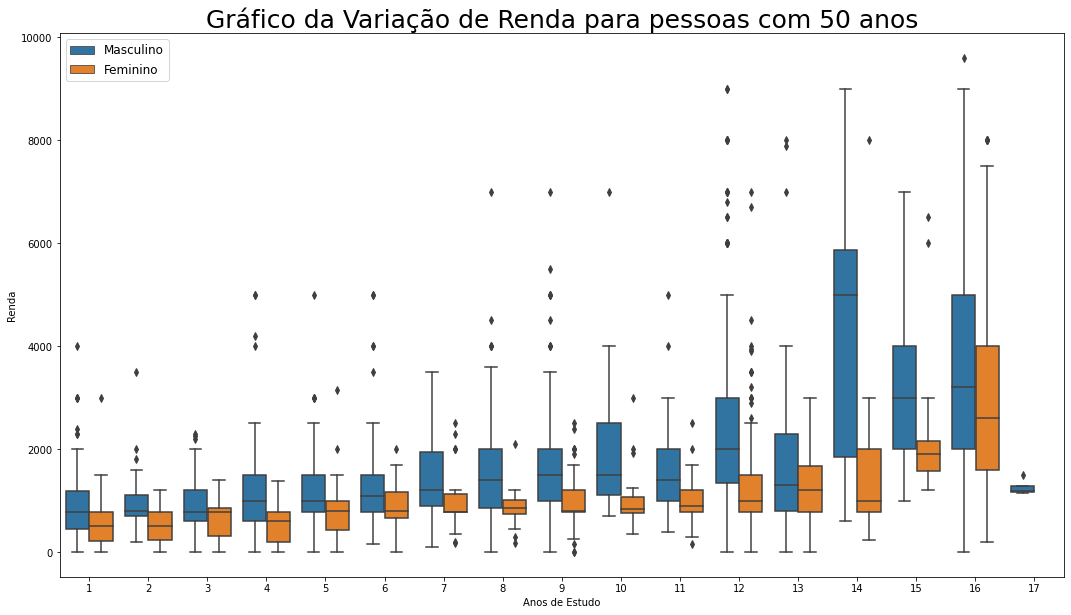

In [35]:
grafico_50anos = sns.boxplot(x = 'Anos de Estudo', y = 'Renda', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'))
grafico_50anos.figure.set_size_inches(18, 10)
grafico_50anos.set_title('Gráfico da Variação de Renda para pessoas com 50 anos', fontsize = 25)
handles, _ = grafico_50anos.get_legend_handles_labels()
grafico_50anos.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
grafico_50anos

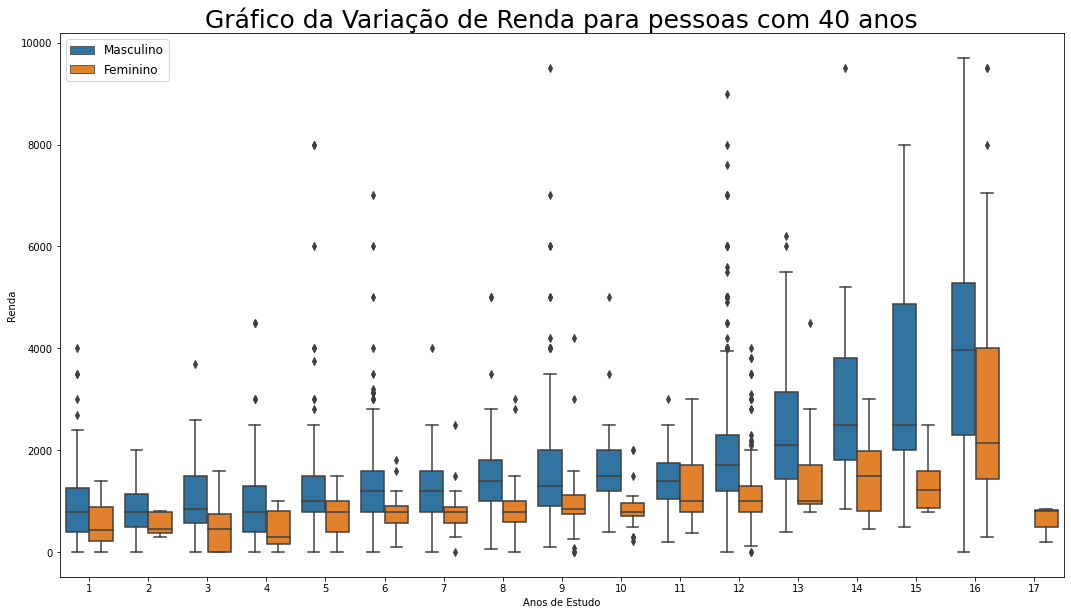

In [36]:
grafico_40anos = sns.boxplot(x = 'Anos de Estudo', y = 'Renda', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 40'))
grafico_40anos.figure.set_size_inches(18, 10)
grafico_40anos.set_title('Gráfico da Variação de Renda para pessoas com 40 anos', fontsize = 25)
handles, _ = grafico_40anos.get_legend_handles_labels()
grafico_40anos.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
grafico_40anos

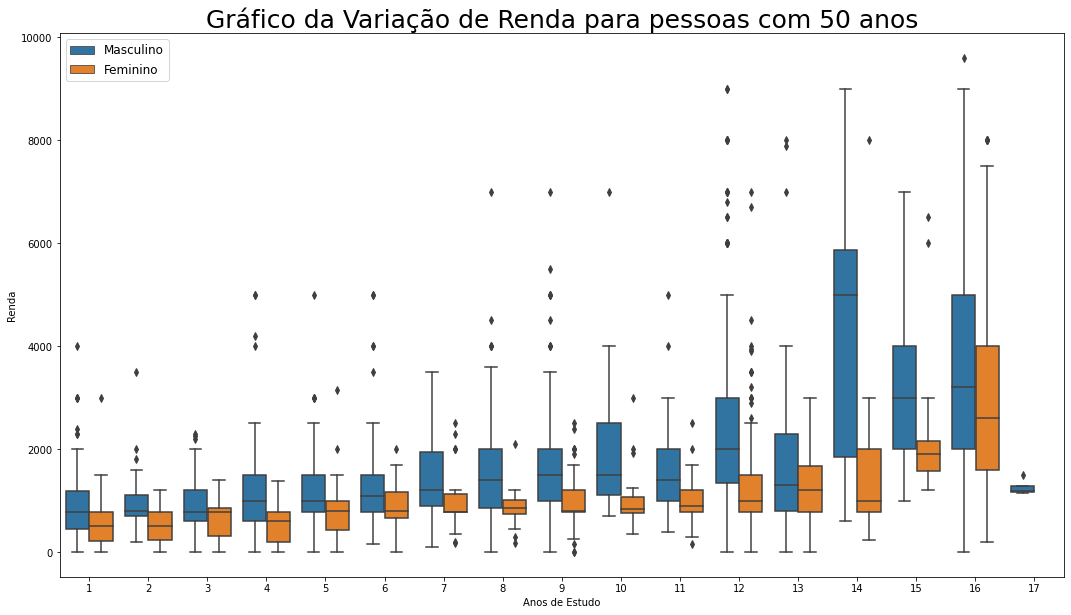

In [37]:
grafico_50anos = sns.boxplot(x = 'Anos de Estudo', y = 'Renda', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'))
grafico_50anos.figure.set_size_inches(18, 10)
grafico_50anos.set_title('Gráfico da Variação de Renda para pessoas com 50 anos', fontsize = 25)
handles, _ = grafico_50anos.get_legend_handles_labels()
grafico_50anos.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
grafico_50anos

> ### Conclusões

Observando os gráicos destaco os pontos que me chamaram a atenção:

- O conjunto dos boxplots formam uma curva crescente no aumento da renda a medida que os anos de estudo aumentam, claro que há casos atípicos da maioria.
- Fica nítida a desigualdade salarial entre homens e mulheres em todas as categorias de estudo.
- Mesmo observando passoas com a mesma idade o "padrão" do aumento da renda junto ao aumento dos anos de estudo continua, e a desigualdade entre homens e mulheres também continua.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [38]:
df_estados = pd.read_excel('Lista Estados e seus Códigos.xlsx', index_col = 'Código')
df_estados = df_estados.to_dict()
df_estados

FileNotFoundError: ignored

In [ ]:
estados = {11: 'Rondônia',
  12: 'Acre',
  13: 'Amazonas',
  14: 'Roraima',
  15: 'Pará',
  16: 'Amapá',
  17: 'Tocantins',
  21: 'Maranhão',
  22: 'Piauí',
  23: 'Ceará',
  24: 'Rio Grande do Norte',
  25: 'Paraíba',
  26: 'Pernambuco',
  27: 'Alagoas',
  28: 'Sergipe',
  29: 'Bahia',
  31: 'Minas Gerais',
  32: 'Espírito Santo',
  33: 'Rio de Janeiro',
  35: 'São Paulo',
  41: 'Paraná',
  42: 'Santa Catarina',
  43: 'Rio Grande do Sul',
  50: 'Mato Grosso do Sul',
  51: 'Mato Grosso',
  52: 'Goiás',
  53: 'Distrito Federal'}

In [ ]:
df_renda_UF = dados.groupby(['UF']).agg({'Renda':['mean', 'median', 'max', 'std']})
df_renda_UF.rename(index = estados, inplace = True)
df_renda_UF

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [ ]:
grafico_renda_uf = sns.boxplot(x = 'UF', y = 'Renda', data = dados)
grafico_renda_uf.figure.set_size_inches(18, 15)
grafico_renda_uf.set_title('Gráfico de Distribuição e Variação de Renda por Estado', fontsize = 24)
grafico_renda_uf.set_xlabel(estados)
grafico_renda_uf

In [ ]:
grafico_renda_uf = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda <= 10000'), orient = 'h')
grafico_renda_uf.figure.set_size_inches(18, 12)
grafico_renda_uf.set_title('Gráfico de Distribuição e Variação de Renda até 20 mil por Estado', fontsize = 18)
grafico_renda_uf.set_yticklabels([i for i in estados.values()])
grafico_renda_uf

> ### Conclusões

Observando o último gráfico, observo que a média salarial e o intervalo salarial no DF é o maior no país.
O Piauí e o Maranhão são os estados com a menor média salarial do país.
São Paulo, apesar de ser considerado o pólo econômico, não possuí uma média salarial acima dos demais.